<center><h1> Automatic Soil Testing Using AI </h1></center>
<br>
<br>

## Dataset Information

Dataset: Soil analysis and native plant propagation

This dataset contains the various elements found in the soil, for instance, organic matter, various nitrogen compounds, potassium, sodium, sulphates, boron, etc, It also contains various soil properties like pH. The target of this data is set to predict the vegetation cover which is the percent vegetative cover of the 102m area surrounding the sample site. The higher the vegetation cover higher is the fertility of the soil for crops.

Vegatation cover is calcuated in percentage from 1 to 100, so, it becomes the regresion task. To achive the results various regression methods are applied and performance of each model is analysed. 

Source: https://catalog.data.gov/dataset/soil-analysis-and-native-plant-propagation-a-case-study-on-laysan-island-papahanaumokuakea-mari 

# Data Preprocessing


### Including Necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [20]:
# setting to view complete attributes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

# reading data from excel sheet
soil_data = pd.read_excel('soil_data.xlsx',sheet_name="Metadata",header=None)

# Viewing first few rows of dataset
soil_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,Metadata - Laysan Island Soils Collection and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65-75%,15-20%,2-9%,<1.0%
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sample #,Veg. Class,DIR.,INT/EXT,Sub- Sample #,Date,Time,Latitude,Longitude,Slope,Aspect,Veg. Pres. #1,Veg. Pres. #2,Veg. Pres. #3,Other Veg.,% Veg. Cover,Soil Description,NO3-N (#/AC),NO3-N (ppm),NH4-N (#/AC),NH4-N (ppm),P Bicar (ppm),K Acet (ppm),SO4-S (ppm),B (ppm),Organic Matter %,pH,SS mmho/cm,Zn (ppm),Mn (ppm),Cu (ppm),Fe (ppm),Ca (meq/100g),Mg (meq/100g),Na (meq/100g),Effervescence,Total Bases (meq/100g),Ca/Total Bases (%),Mg/Total Bases (%),K/Total Bases (%),Na/Total Bases (%)
3,1,IPOPES,NW,INT,1,2012-06-04 00:00:00,13:50:00,N25.77485,W171.73539,2,92,IPOPES,ERAVAR,Sicyos spp.,NaN,100,"Light brown, dry, hydrophobic",46,23,4.5,2.25,101,32,12,0.71,0.96,7.8,0.4,1.7,1,0.3,4,6.6,0.8,0.12,Heavy,7.60184,86.8211,10.5238,1.0766,1.57856
4,2,IPOPES,NW,INT,2,2012-06-04 00:00:00,14:43:00,N25.77774,W171.73643,1,167,IPOPES,ERAVAR,BOEREP,NaN,95,"Loose, Tan, dry & Sandy",12,6,1.5,0.75,58,10,7,0.27,0.3,8.2,0.22,0.8,1,0.1,1,5,0.5,0.07,Heavy,5.59558,89.3563,8.93563,0.457066,1.25099
5,3,IPOPES,NW,INT,3,2012-06-04 00:00:00,14:10:00,N25.77628,W171.73480,5,75,IPOPES,ERAVAR,BOEREP,Sicyos spp.,98,"Light brown, fine sand",14.5,7.25,2,1,115,8,10,0.56,0.62,7.9,0.25,1.4,1,0.2,2,5.2,0.4,0.04,Heavy,5.66046,91.8653,7.06656,0.361461,0.706656
6,4,IPOPES,NW,INT,4,2012-06-06 00:00:00,10:28:00,N25.76979,W171.73617,3,70,IPOPES,ERAVAR,Sicyos spp.,NaN,100,"Light brown, fine sand",42,21,2.5,1.25,130,30,13,0.78,1.04,7.9,0.36,1.8,1,0.3,2,6.1,0.7,0.1,Heavy,6.97673,87.4336,10.0334,1.09975,1.43334
7,5,IPOPES,NW,EXT,1,2012-06-08 00:00:00,09:30:00,N25.77313,W171.74076,6,299,SCATAC,IPOPES,NAMSAN,ERAVAR,15,"Light tan, coarse sand",3.5,1.75,1,0.5,17,4,6,0.25,0.1,8.8,0.23,0.3,1,0.1,1,4.7,0.5,0.1,Heavy,5.31023,88.5084,9.41579,0.19265,1.88316
8,6,IPOPES,NW,EXT,2,2012-06-08 00:00:00,10:00:00,N25.77141,W171.74171,2,311,IPOPES,ERAVAR,CONBON,"BOEREP, NAMSAN",45,"Light tan, coarse sand, darker below 4""",4,2,1.5,0.75,40,8,6,0.24,0.22,8.3,0.19,0.9,1,0.1,1,4.9,0.5,0.09,Heavy,5.51046,88.9218,9.07365,0.3713,1.63326
9,7,IPOPES,NW,EXT,3,2012-06-11 00:00:00,10:30:00,N25.78053,W171.73324,0,0,IPOPES,SCATAC,NAMSAN,NaN,45,"Tan, coarse sand",3,1.5,0.5,0.25,21,12,5,0.2,0.08,8.7,0.18,0.3,1,0.1,1,5.7,0.4,0.08,Heavy,6.21069,91.7772,6.44051,0.494157,1.2881


###  Preprocessing Data

In [21]:
# removing unnecessary columns and rows that do not contains data
soil_data = soil_data.drop(np.arange(103,123),axis=0)
soil_data = soil_data.drop([0,1,2,77,78,91],axis=0)
soil_data = soil_data.drop(np.arange(0,15),axis=1)
soil_data = soil_data.drop([17,19,16,27,29,35,36,37,38,39,40],axis=1)
# soil_data = soil_data.drop(soil_data.values[:,]==np.nan,axis=0)

#renaming column names and units of each attributes
column_names = ['Vegetation Cover','NO3','NH4','P','K','SO4','B','Organic Matter','pH','Zn','Cu','Fe','Ca','Mg','Na']
attribute_units = ['%age','ppm','ppm','ppm','ppm','ppm','ppm',"%age",'pH','ppm','ppm','ppm','meq/100g','meq/100g','meq/100g']


#assuring length of column and attribute_units is same
assert(len(attribute_units) == len(column_names))


#creating new dataframe with column name
soil_data = pd.DataFrame(soil_data.values,columns=column_names)

#viewing final data frame
soil_data.head()


,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6,0.75,58,10,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
2,98,7.25,1,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.1
4,15,1.75,0.5,17,4,6,0.25,0.1,8.8,0.3,0.1,1,4.7,0.5,0.1


### Saving process data

In [13]:
soil_data.to_csv('processed_soil_data.csv',index=False)

In [14]:
soil_data = None

# Data Visualization

### Separating Data into X and Y, and  Normalizing Data

In [15]:
# reading processed data
soil_data = pd.read_csv('processed_soil_data.csv')


# Normalizing
soil_data = (soil_data - soil_data.min())/(soil_data.max() - soil_data.min())

# separating data into X and Y vectors
Y, X = soil_data[soil_data.columns[1:]], soil_data['Vegetation Cover']

soil_data.head()

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,1.000000,0.035912,0.142857,0.565217,0.1750,0.031496,0.036803,0.213483,0.285714,0.161616,0.166667,1.000000,0.289157,0.083333,0.010989
1,0.949495,0.009077,0.035714,0.298137,0.0375,0.011811,0.011501,0.065169,0.571429,0.070707,0.000000,0.000000,0.096386,0.033333,0.004884
2,0.979798,0.011050,0.053571,0.652174,0.0250,0.023622,0.028177,0.137079,0.357143,0.131313,0.083333,0.333333,0.120482,0.016667,0.001221
3,1.000000,0.032755,0.071429,0.745342,0.1625,0.035433,0.040828,0.231461,0.357143,0.171717,0.166667,0.333333,0.228916,0.066667,0.008547
4,0.141414,0.002368,0.017857,0.043478,0.0000,0.007874,0.010351,0.020225,1.000000,0.020202,0.000000,0.000000,0.060241,0.033333,0.008547


### Corelation Matrix

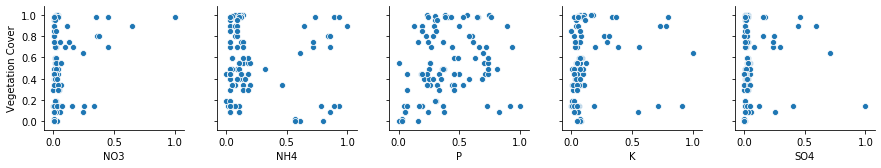

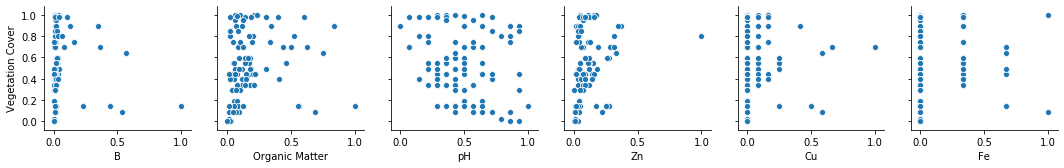

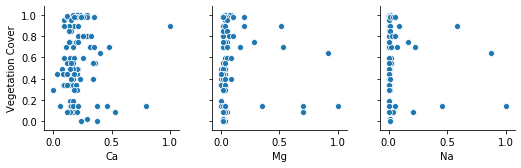

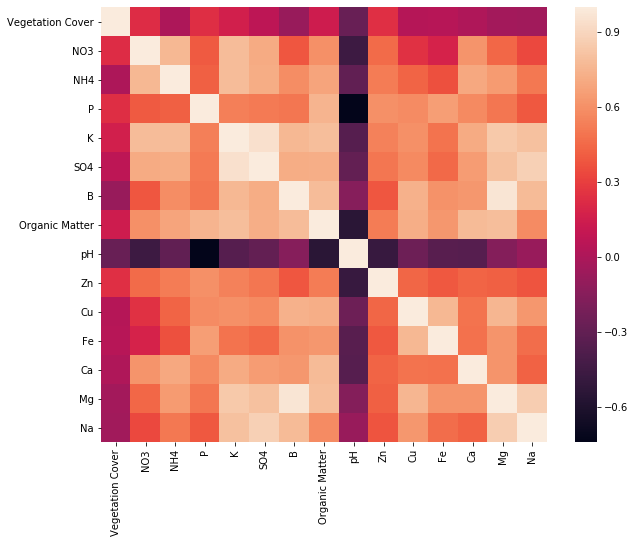

In [16]:
import seaborn as sns


#pair plots
pairplot1 = sns.pairplot(soil_data,x_vars=soil_data.columns[1:6],y_vars=['Vegetation Cover'])
plt.show()

pairplot2 = sns.pairplot(soil_data,x_vars=soil_data.columns[6:12],y_vars=['Vegetation Cover'])
plt.show()

pairplot3 = sns.pairplot(soil_data,x_vars=soil_data.columns[12:15],y_vars=['Vegetation Cover'])
plt.show()




# getting coeralation values
values_ = soil_data.corr()

# plotting values
plt.figure(figsize=(10,8))
sns.heatmap(values_,annot=False)

## Visualizing result of corelation matrix

It is clear from above matrix that Vegetation Cover is highly depends on pH. It also highly depends on SO4, Na, Mg, B, NH4, NO3

### Filtering required attributes into X and Y set

In [17]:
X, Y = X, Y[['pH','Na','Mg','B','NH4','NO3','SO4']]
Y.head()

,pH,Na,Mg,B,NH4,NO3,SO4
0,0.285714,0.010989,0.083333,0.036803,0.142857,0.035912,0.031496
1,0.571429,0.004884,0.033333,0.011501,0.035714,0.009077,0.011811
2,0.357143,0.001221,0.016667,0.028177,0.053571,0.011050,0.023622
3,0.357143,0.008547,0.066667,0.040828,0.071429,0.032755,0.035433
4,1.000000,0.008547,0.033333,0.010351,0.017857,0.002368,0.007874
